# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Load tha Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the file path
path = '/content/drive/My Drive/twitter_training.csv'

In [6]:
sentiments=pd.read_csv(path)

# **Data Analysis**

In [7]:
# Print first 5 rows
sentiments.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
# Add headers to the column
column_names=['ID','Entity','Sentiments','Remarks']

In [9]:
sentiments_new=pd.read_csv(path,names=column_names)
sentiments_new.head()

,ID,Entity,Sentiments,Remarks
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
sentiments_new.shape

(74682, 4)

In [11]:
sentiments_new.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [12]:
sentiments_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          74682 non-null  int64 
 1   Entity      74682 non-null  object
 2   Sentiments  74682 non-null  object
 3   Remarks     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
# Check the null values
sentiments_new.isnull().sum()

ID              0
Entity          0
Sentiments      0
Remarks       686
dtype: int64

In [14]:
# Drop the null values
df = sentiments_new.dropna()

In [15]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Remarks       0
dtype: int64

In [16]:
df.shape

(73996, 4)

# **Data Visualization**

In [17]:
# Distribution of Sentiments
df_sentiment=df['Sentiments'].value_counts()
df_sentiment

Sentiments
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

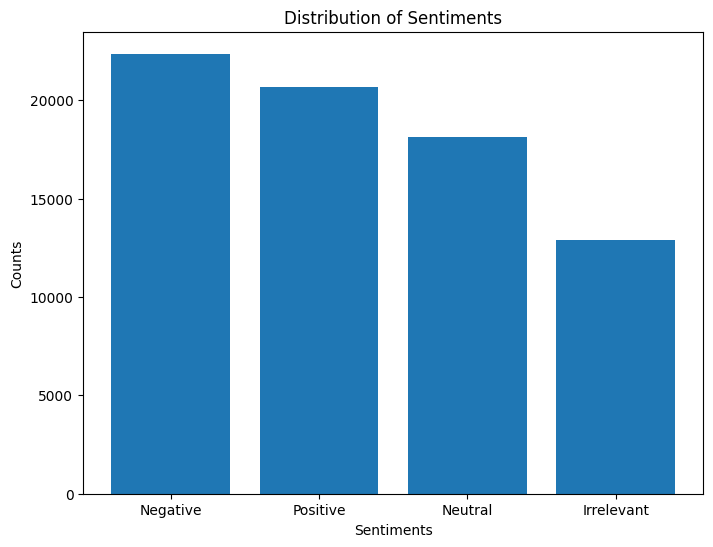

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(df_sentiment.index, df_sentiment.values)
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.title('Distribution of Sentiments')
plt.show()

In [19]:
df_entity=df['Entity'].value_counts()
df_entity

Entity
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                

In [20]:
top5=df['Entity'].value_counts().sort_values(ascending=False)[:5]
top5

Entity
MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Name: count, dtype: int64

<Figure size 2000x1600 with 0 Axes>

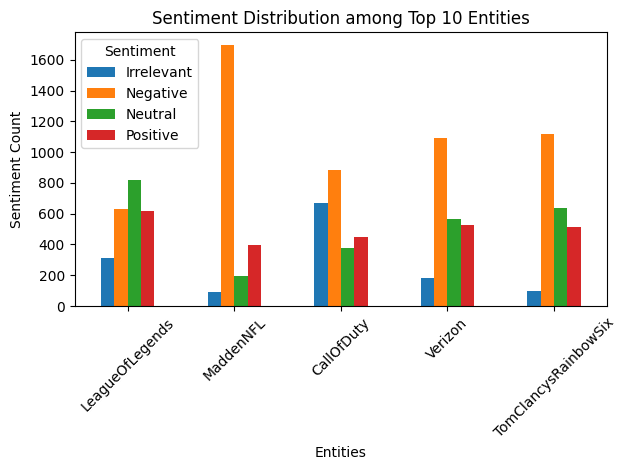

In [21]:
sentiment_counts = df.groupby(['Entity', 'Sentiments']).size().unstack(fill_value=0)
entity_sentiment_counts = sentiment_counts.groupby('Entity').sum()
entity_total_sentiments = entity_sentiment_counts.sum(axis=1)
top5 = entity_total_sentiments.nlargest(5).index
top5_entity_sentiments = entity_sentiment_counts.loc[top5]
plt.figure(figsize=(20,16))
top5_entity_sentiments.plot(kind='bar')
plt.xlabel('Entities')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Distribution among Top 10 Entities')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

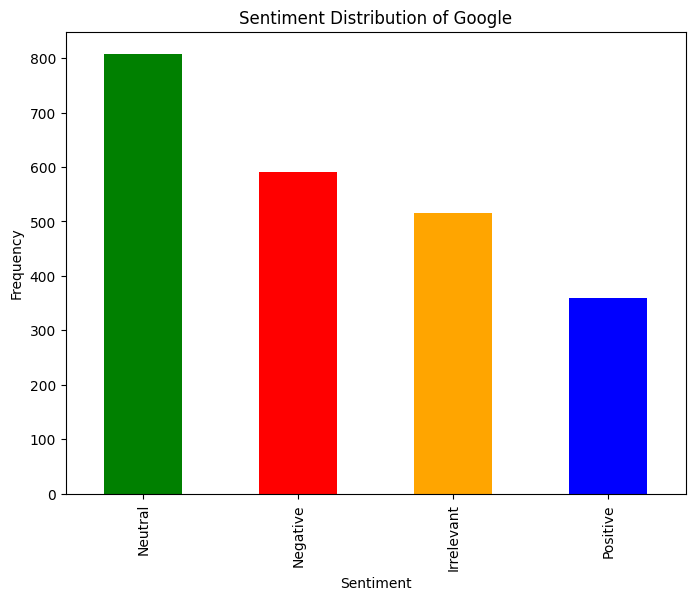

In [22]:
entity_data = df[df['Entity'] == 'Google']
sentiment_counts = entity_data['Sentiments'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'orange','blue'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Google')
plt.show()

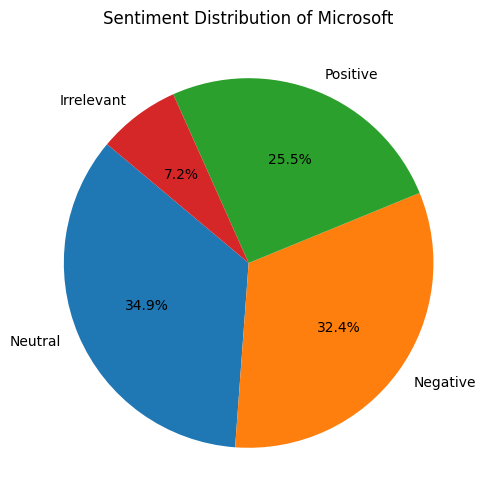

In [23]:
entity_data = df[df['Entity'] == 'Microsoft']
sentiment_counts = entity_data['Sentiments'].value_counts()
plt.figure(figsize=(8, 6))
labels = sentiment_counts.index  # Labels for pie chart segments
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Microsoft')
plt.show()

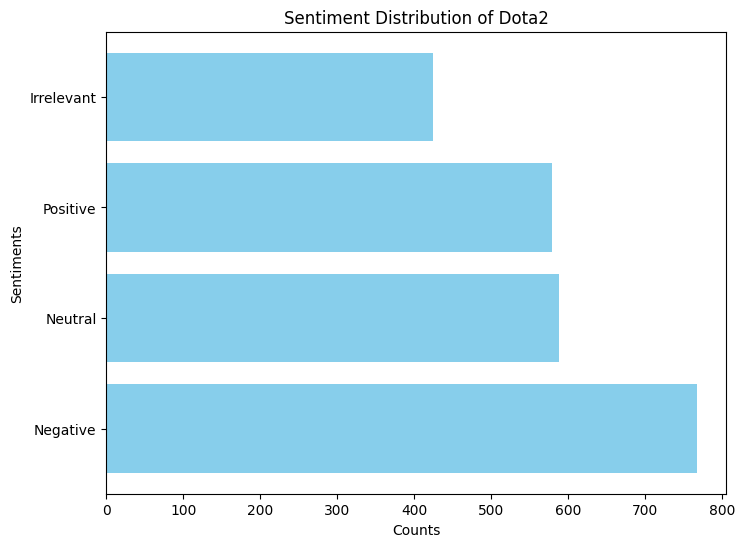

In [24]:
entity_data = df[df['Entity'] == 'Dota2']
sentiment_counts = entity_data['Sentiments'].value_counts()
plt.figure(figsize=(8, 6))
plt.barh(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Sentiments')
plt.title('Sentiment Distribution of Dota2')
plt.show()

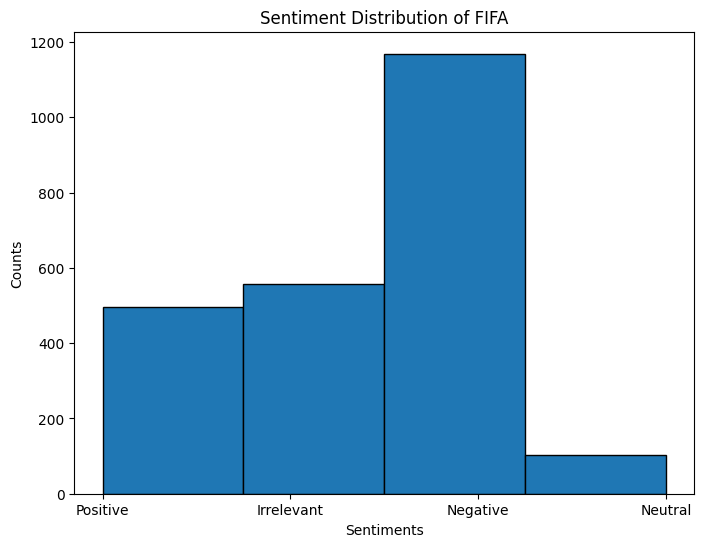

In [25]:
entity_data = df[df['Entity'] == 'FIFA']
sentiment_counts = entity_data['Sentiments'].value_counts()
plt.figure(figsize=(8, 6))
plt.hist(entity_data['Sentiments'], bins=len(sentiment_counts), edgecolor='black')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.title('Sentiment Distribution of FIFA')
plt.show()